In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from random import randrange
import numpy as np

## Plotando BH toda

<AxesSubplot:>

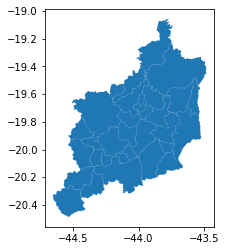

In [2]:
map_df = gpd.read_file("regiao_metropolitana_bh-polygon.shp")

# projetando e criando o campo 'escolhido'
map_df = map_df[["Name", 'geometry']].assign(escolhido= lambda x: True)

map_df.plot()

### Pegando 3 amostras de regiões aleatórias

In [3]:
amostra = []

for _ in range(3):
    novo = randrange(map_df.shape[0])
    
    while(novo in amostra):
         novo = randrange(map_df.shape[0])
    
    amostra.append(novo)
    
map_df.loc[amostra, 'escolhido'] = False

## Plotando eles

<Figure size 432x288 with 0 Axes>

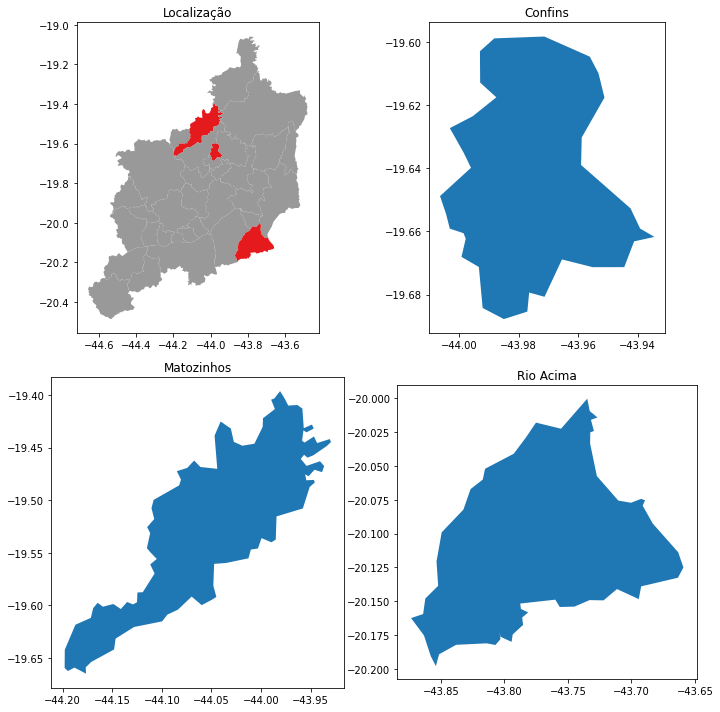

In [4]:

plt.suptitle("3 bairros aleatórios de BH")

nomes = map_df.loc[amostra]["Name"].values

fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(10,10))


ax1.set_title("Localização")
map_df.plot(ax=ax1, column='escolhido', cmap='Set1')

ax2.set_title(nomes[0])
map_df.loc[[amostra[0]]].plot(ax=ax2)

ax3.set_title(nomes[1])
map_df.loc[[amostra[1]]].plot(ax=ax3)

ax4.set_title(nomes[2])
map_df.loc[[amostra[2]]].plot(ax=ax4)

fig.tight_layout()

## Plotando coordenadas especificas
### Pegando 3 pontos:

In [5]:
emge = [-19.9, -43.9]
inhotim = [-20.12, -44.2]
lagoaPampulha = [-19.85, -43.98]

coordenadas = np.stack([emge,inhotim, lagoaPampulha], axis=1)

### plotando:

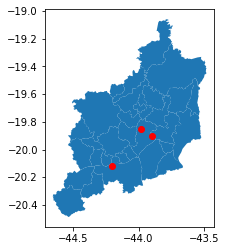

In [10]:
a = map_df.plot()

plt.plot(coordenadas[1], coordenadas[0], 'o', color='r')